In [1]:
#2021.07.02 FRI 
#Hankyeong

##CH12. 시계열분석 기본
#00. 패키지 호출
import warnings
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from datetime import datetime
from fbprophet import Prophet
import pandas_datareader as pdr 
import yfinance as yf 

#00-1. 시각화 옵션 설정하기. 
%matplotlib inline 

#00-2. warning message ignore
warnings.filterwarnings(action='ignore')


In [2]:
#01. yfinance 패키지를 이용해 주식 데이터 받아오기. 
#(1) 미국 나스닥 1000지수(QQQ) 데이터셋 들고오기. 
qqq = yf.download('QQQ',data_source='yahoo',start=datetime(1994,1,2),end=datetime(2021,7,1))
qqq

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1999-03-10,51.125000,51.156250,50.281250,51.062500,44.335434,5232000
1999-03-11,51.437500,51.734375,50.312500,51.312500,44.552479,9688600
1999-03-12,51.125000,51.156250,49.656250,50.062500,43.467171,8743600
1999-03-15,50.437500,51.562500,49.906250,51.500000,44.715282,6369000
1999-03-16,51.718750,52.156250,51.156250,51.937500,45.095146,4905800
...,...,...,...,...,...,...
2021-06-24,349.730011,351.459991,349.170013,349.890015,349.890015,32581600
2021-06-25,350.470001,350.720001,348.839996,349.459991,349.459991,28682800
2021-06-28,350.779999,353.850006,350.720001,353.709991,353.709991,39130300


In [3]:
#(2) 필요 변수만 추출하고, 컬럼 명을 prophet 패키지에 맞게 변경하기. 
df_qqq = pd.DataFrame({
    'Close' : qqq['Close']
})
df_qqq.reset_index(inplace=True)
df_qqq.columns = ['ds', 'y']
df_qqq

,ds,y
0,1999-03-10,51.062500
1,1999-03-11,51.312500
2,1999-03-12,50.062500
3,1999-03-15,51.500000
4,1999-03-16,51.937500
...,...,...
5610,2021-06-24,349.890015
5611,2021-06-25,349.459991
5612,2021-06-28,353.709991
5613,2021-06-29,354.989990


In [4]:
#(3) prophet 모델 설정하기. 
model = Prophet()

#(4) 모델 학습하기. 
model.fit(df_qqq)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [5]:
#(5) 모델 예측할 기간 설정 후 예측하기. 
future = model.make_future_dataframe(periods=365)
forecast = model.predict(future)

#(6) forecast 데이터셋 살펴보기. 
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1999-03-10,47.926422,32.581103,63.302568,47.926422,47.926422,-0.625399,-0.625399,-0.625399,-0.494730,-0.494730,-0.494730,-0.130669,-0.130669,-0.130669,0.0,0.0,0.0,47.301023
1,1999-03-11,48.049561,32.686337,62.347949,48.049561,48.049561,-0.780515,-0.780515,-0.780515,-0.520977,-0.520977,-0.520977,-0.259539,-0.259539,-0.259539,0.0,0.0,0.0,47.269045
2,1999-03-12,48.172700,32.376857,61.192115,48.172700,48.172700,-1.041430,-1.041430,-1.041430,-0.660074,-0.660074,-0.660074,-0.381356,-0.381356,-0.381356,0.0,0.0,0.0,47.131270
3,1999-03-15,48.542117,32.719036,62.563900,48.542117,48.542117,-1.317189,-1.317189,-1.317189,-0.623764,-0.623764,-0.623764,-0.693425,-0.693425,-0.693425,0.0,0.0,0.0,47.224928
4,1999-03-16,48.665256,32.898360,62.256852,48.665256,48.665256,-1.295756,-1.295756,-1.295756,-0.519041,-0.519041,-0.519041,-0.776715,-0.776715,-0.776715,0.0,0.0,0.0,47.369500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5975,2022-06-26,340.722217,325.022067,359.653591,332.739028,349.244962,1.662064,1.662064,1.662064,1.409293,1.409293,1.409293,0.252771,0.252771,0.252771,0.0,0.0,0.0,342.384281
5976,2022-06-27,340.838190,322.609071,359.654381,332.799971,349.395108,-0.462703,-0.462703,-0.462703,-0.623764,-0.623764,-0.623764,0.161062,0.161062,0.161062,0.0,0.0,0.0,340.375487
5977,2022-06-28,340.954163,322.986547,358.748247,332.873409,349.546534,-0.444340,-0.444340,-0.444340,-0.519041,-0.519041,-0.519041,0.074701,0.074701,0.074701,0.0,0.0,0.0,340.509823
5978,2022-06-29,341.070137,322.719740,358.923122,332.955626,349.696076,-0.499558,-0.499558,-0.499558,-0.494730,-0.494730,-0.494730,-0.004828,-0.004828,-0.004828,0.0,0.0,0.0,340.570578


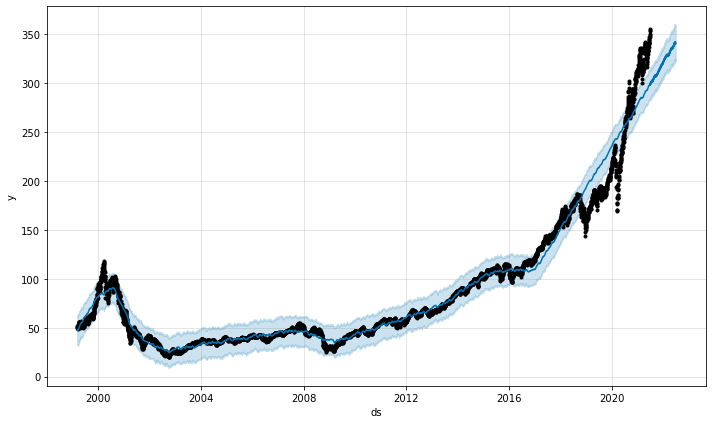

In [6]:
#(7) 예측값 시각화하기. 
model.plot(forecast)
plt.show()

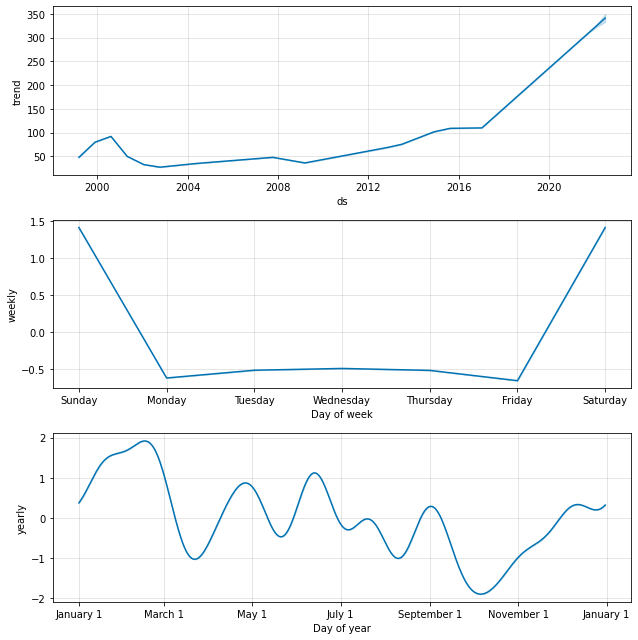

In [7]:
#(8) 모델의 components 확인하기. 
model.plot_components(forecast)
plt.show()

In [8]:
#MEMO. 각 components가 의미하는 것
#      Trend  : 추세요인이란 인구의 증가, 기술의 변화 등과 같은 요인에 의해 장기간 일정한 방향으로 상승 또는 하락하는 경향을 보이는 요인 
#      Weekly : 주 계절요인(일정한 주기를 가지는 상하 반복의 규칙적인 변동을 계절변동)
#      Yearly : 연 계절요인

In [10]:
#(9) forecast 구조 파악하기. 
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1999-03-10,47.926422,32.581103,63.302568,47.926422,47.926422,-0.625399,-0.625399,-0.625399,-0.494730,-0.494730,-0.494730,-0.130669,-0.130669,-0.130669,0.0,0.0,0.0,47.301023
1,1999-03-11,48.049561,32.686337,62.347949,48.049561,48.049561,-0.780515,-0.780515,-0.780515,-0.520977,-0.520977,-0.520977,-0.259539,-0.259539,-0.259539,0.0,0.0,0.0,47.269045
2,1999-03-12,48.172700,32.376857,61.192115,48.172700,48.172700,-1.041430,-1.041430,-1.041430,-0.660074,-0.660074,-0.660074,-0.381356,-0.381356,-0.381356,0.0,0.0,0.0,47.131270
3,1999-03-15,48.542117,32.719036,62.563900,48.542117,48.542117,-1.317189,-1.317189,-1.317189,-0.623764,-0.623764,-0.623764,-0.693425,-0.693425,-0.693425,0.0,0.0,0.0,47.224928
4,1999-03-16,48.665256,32.898360,62.256852,48.665256,48.665256,-1.295756,-1.295756,-1.295756,-0.519041,-0.519041,-0.519041,-0.776715,-0.776715,-0.776715,0.0,0.0,0.0,47.369500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5975,2022-06-26,340.722217,325.022067,359.653591,332.739028,349.244962,1.662064,1.662064,1.662064,1.409293,1.409293,1.409293,0.252771,0.252771,0.252771,0.0,0.0,0.0,342.384281
5976,2022-06-27,340.838190,322.609071,359.654381,332.799971,349.395108,-0.462703,-0.462703,-0.462703,-0.623764,-0.623764,-0.623764,0.161062,0.161062,0.161062,0.0,0.0,0.0,340.375487
5977,2022-06-28,340.954163,322.986547,358.748247,332.873409,349.546534,-0.444340,-0.444340,-0.444340,-0.519041,-0.519041,-0.519041,0.074701,0.074701,0.074701,0.0,0.0,0.0,340.509823
5978,2022-06-29,341.070137,322.719740,358.923122,332.955626,349.696076,-0.499558,-0.499558,-0.499558,-0.494730,-0.494730,-0.494730,-0.004828,-0.004828,-0.004828,0.0,0.0,0.0,340.570578


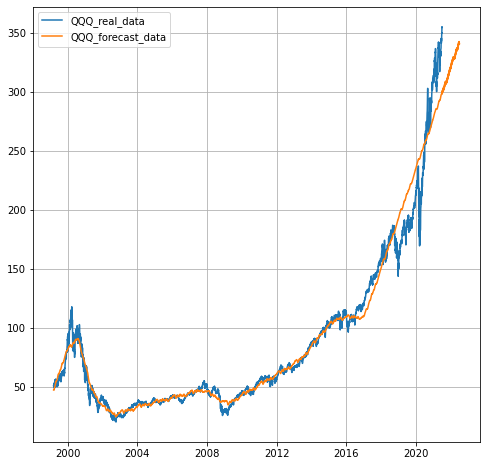

In [9]:
#(10) forecast의 yhat 변수로 비교 시각화하기. 
plt.figure(figsize=(8,8))
plt.plot(qqq.index, qqq['Close'], label='QQQ_real_data')
plt.plot(forecast['ds'], forecast['yhat'], label='QQQ_forecast_data')
plt.grid()
plt.legend()
plt.show()